<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação 
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
penguim = sns.load_dataset('penguins')

In [4]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

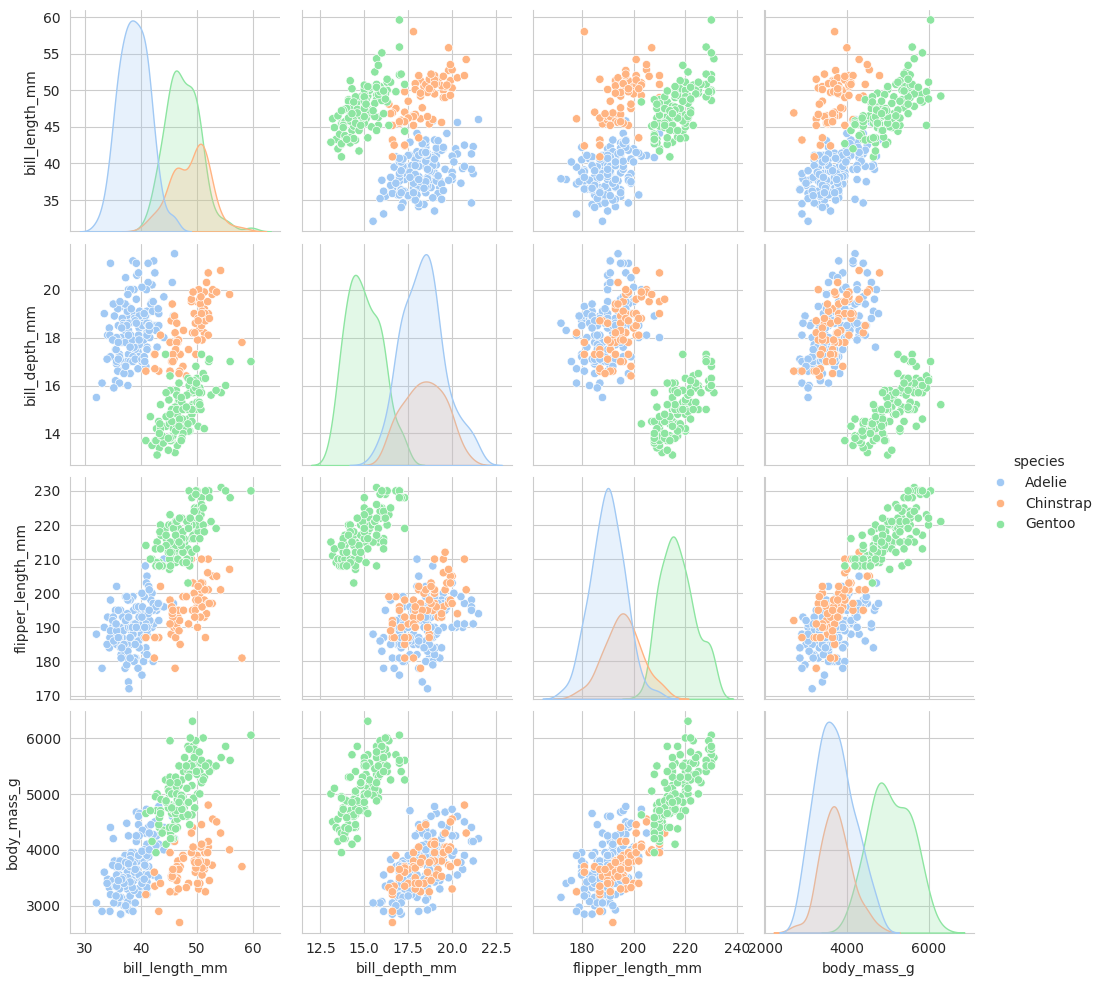

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:** 
Nem todos os atributos fazem uma boa separação das espécies. Na primeira linha é possivel notar bem a separação das especies em grupos. Ja na segunda linha, o uso do depth e length é possivle notar bem a distinção de especies como na primeira linha; padrão que se repete nas proximas linhas o que indica que essa combinação seria a mais indicada para identificar especies e fazer predições

 - Sexo por espécie:

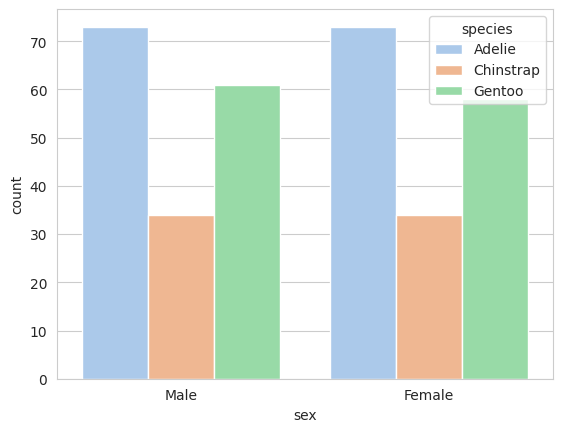

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:** 
Pelo grafico podemos dizer que a população de cada especies, está bem controlada e distribuida para cada sexo. 

 - Ilha por espécie:

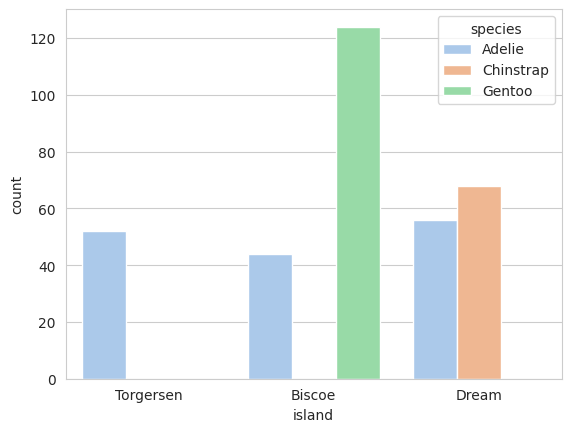

In [7]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:** 
A distribuição das especies por ilha é bem desigual, enquato que a Adelie domina a ilha Torgersen (ainda que tena presença em todas) por ser a unica nela, a Gentoo, pelo quantitativo domina a ilha Biscoe e a terceira ilha é repartida a população entre Adelie e Chinstrap. O que pode sugerir que a especies Adelie é a unica a fazer migração entre as ilhas

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [16]:
# resposta da questão 2.1
penguim.isna().sum() /len(penguim)

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
dtype: float64

In [17]:
# Calcular a média da coluna 
media_quantidade = penguim['bill_length_mm'].mean()

# Preencher os valores nulos na coluna
penguim['bill_length_mm'].fillna(media_quantidade, inplace=True)

In [18]:
# Calcular a média da coluna 
media_quantidade = penguim['bill_depth_mm'].mean()

# Preencher os valores nulos na coluna
penguim['bill_depth_mm'].fillna(media_quantidade, inplace=True)

In [19]:
#percentagem baixa de valores nulos / exclusao das linhas
penguim = penguim.dropna(subset=['flipper_length_mm'])
penguim = penguim.dropna(subset=['body_mass_g'])

In [20]:
# Calcular a desvio médio 
desvio = penguim['bill_depth_mm'].std()

# Preencher os valores nulos na coluna
penguim['bill_depth_mm'].fillna(desvio, inplace=True)

### **2.2. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [21]:
# resposta da questão 2.2
penguim.loc[penguim['island'] == 'Biscoe', 'island_nom'] = 0
penguim.loc[penguim['island'] == 'Dream', 'island_nom'] = 1
penguim.loc[penguim['island'] == 'Torgersen', 'island_nom'] = 2
penguim.loc[penguim['sex'] == 'Male', 'sex_nom'] = 0
penguim.loc[penguim['sex'] == 'Female', 'sex_nom'] = 1

### **2.3. Limpeza** 

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe. 

In [22]:
# resposta da questão 2.3
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   island_nom         342 non-null    float64
 8   sex_nom            333 non-null    float64
dtypes: float64(6), object(3)
memory usage: 26.7+ KB


In [23]:
penguim = penguim.drop(['island',  'sex'], axis=1)

In [24]:
penguim.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_nom,sex_nom
0,Adelie,39.1,18.7,181.0,3750.0,2.0,0.0
1,Adelie,39.5,17.4,186.0,3800.0,2.0,1.0
2,Adelie,40.3,18.0,195.0,3250.0,2.0,1.0
4,Adelie,36.7,19.3,193.0,3450.0,2.0,1.0
5,Adelie,39.3,20.6,190.0,3650.0,2.0,0.0


### **2.4. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [25]:
# resposta da questão 2.4
from sklearn.model_selection import train_test_split
X = penguim.drop(columns=['species'])  
y = penguim['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** 23

In [26]:
# resposta da questão 3.1
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

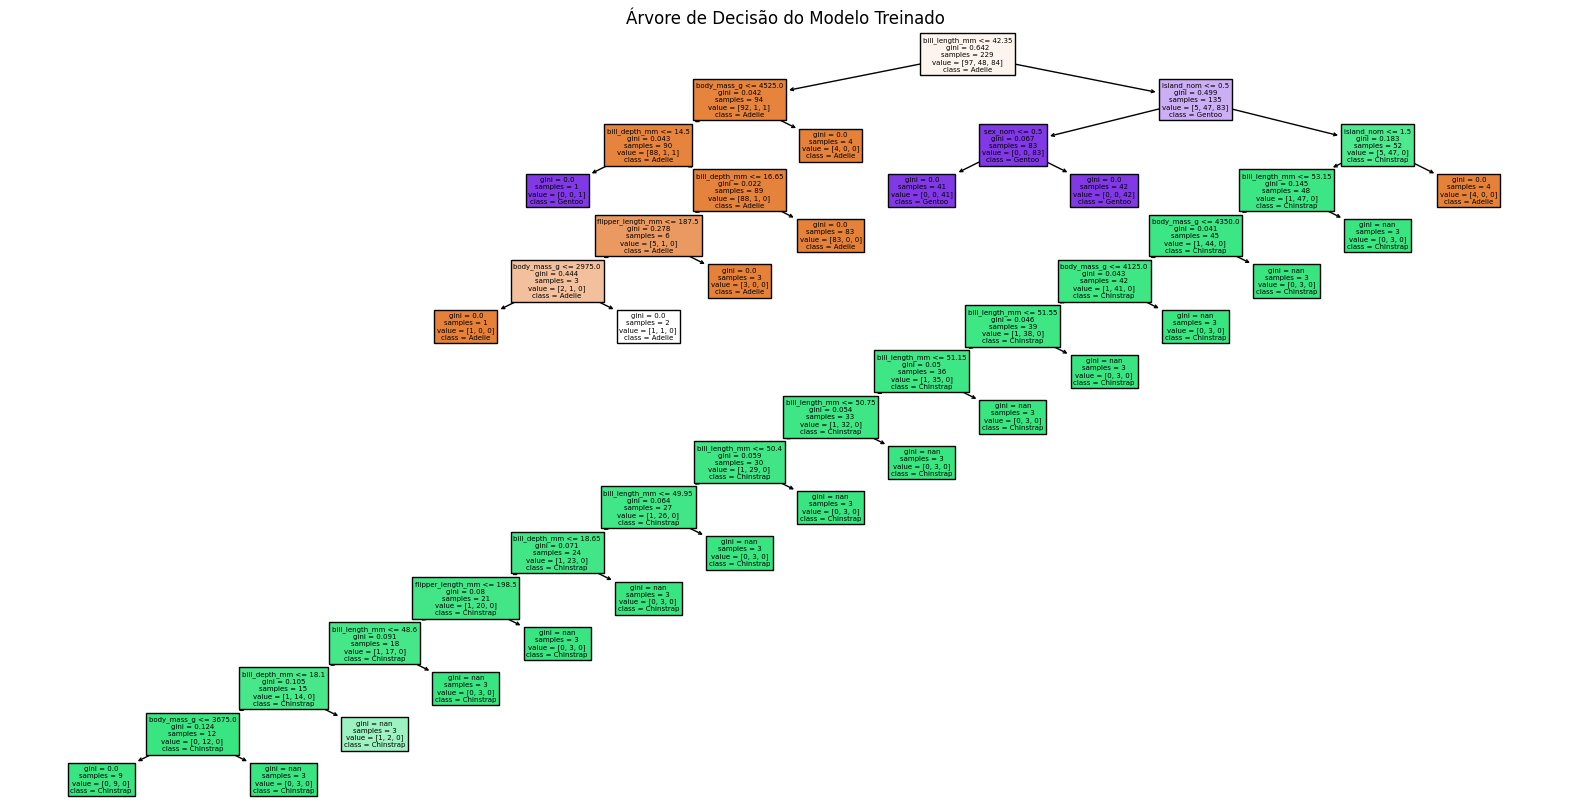

A árvore treinada possui 23 folhas.


In [27]:
# Geração do gráfico da árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=tree_model.classes_)
plt.title('Árvore de Decisão do Modelo Treinado')
plt.show()

# Quantidade de folhas na árvore treinada
num_leaves = tree_model.get_n_leaves()
print(f'A árvore treinada possui {num_leaves} folhas.')


### **3.2. Avaliação** 

**a.** Matriz de Confusão 

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** teve uma taxa muito boa de verdadeiro positivo. 

Matriz de Confusão:
[[50  1  3]
 [ 0 20  0]
 [ 2  0 37]]


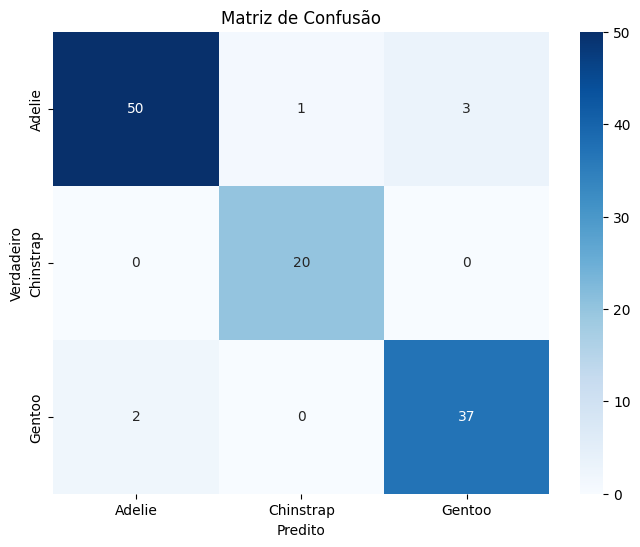

In [28]:
# resposta da questão 3.2.a

# Avaliação do modelo com a matriz de confusão
y_pred = tree_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)

# Visualização da matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=tree_model.classes_, yticklabels=tree_model.classes_)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(tree_model, X, y, cv=kf)
print (f'Acuracia média:{scores.mean():.2f}')
print(f'Desvio Padrao: {scores.std():.2f}')

Acuracia média:0.96
Desvio Padrao: 0.01


**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [29]:
# resposta da questão 3.2.b
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2%}')

Acurácia do modelo: 94.69%


## 4\. Predição  

### **4.1. Novo penguim** 

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [37]:
n_penguim = np.array([0, 38.2, 18.1, 185.0, 3950.0, 0])
especie = tree_model.predict(n_penguim.reshape(1, -1))
print(especie)

['Adelie']


C:\Users\LeaoN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [39]:
# resposta da questão 4.1
# Predição para um novo pinguim

new_penguin = pd.DataFrame({
    'bill_length_mm': [38.2],
    'bill_depth_mm': [18.1],
    'flipper_length_mm': [185.0],
    'body_mass_g': [3950.0],
    'island_nom': [0],
    'sex_nom': [0]
})

# Certifiando a ordem das colunas
new_penguin = new_penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_nom', 'sex_nom']]

# Previsão com o modelo treinado
predicted_species = tree_model.predict(new_penguin)
print(f'A espécie prevista para o novo pinguim é: {predicted_species[0]}')


A espécie prevista para o novo pinguim é: Adelie


---